# Real Estate Price prediction

Problem statement : The goal is to predict the real estate price to help individual and business make informed decisions in real estate market.

In [117]:
# importing librabries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

reading the csv file

In [10]:
real_estate_data = pd.read_csv("Real_Estate.csv")

real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [12]:
real_estate_data.shape

(414, 7)

There are total 414 rows and 7 columns

In [15]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [17]:
print(real_estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


# EDA

In [20]:
real_estate_data['Transaction date']=pd.to_datetime(real_estate_data['Transaction date'])

In [26]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [28]:
real_estate_data.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-13 03:16:11.247379200,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
min,2012-09-02 16:42:30.519336,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,2012-11-21 03:54:22.174344448,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,2013-02-12 00:48:02.949638400,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,2013-05-02 09:55:51.372080640,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,2013-08-01 09:49:41.506402,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716
std,NaN,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935


The avertage age of house is 18 years with average unit area price of 29 and the average distance to MRT station is 1064 meters. 

# Data Visualization

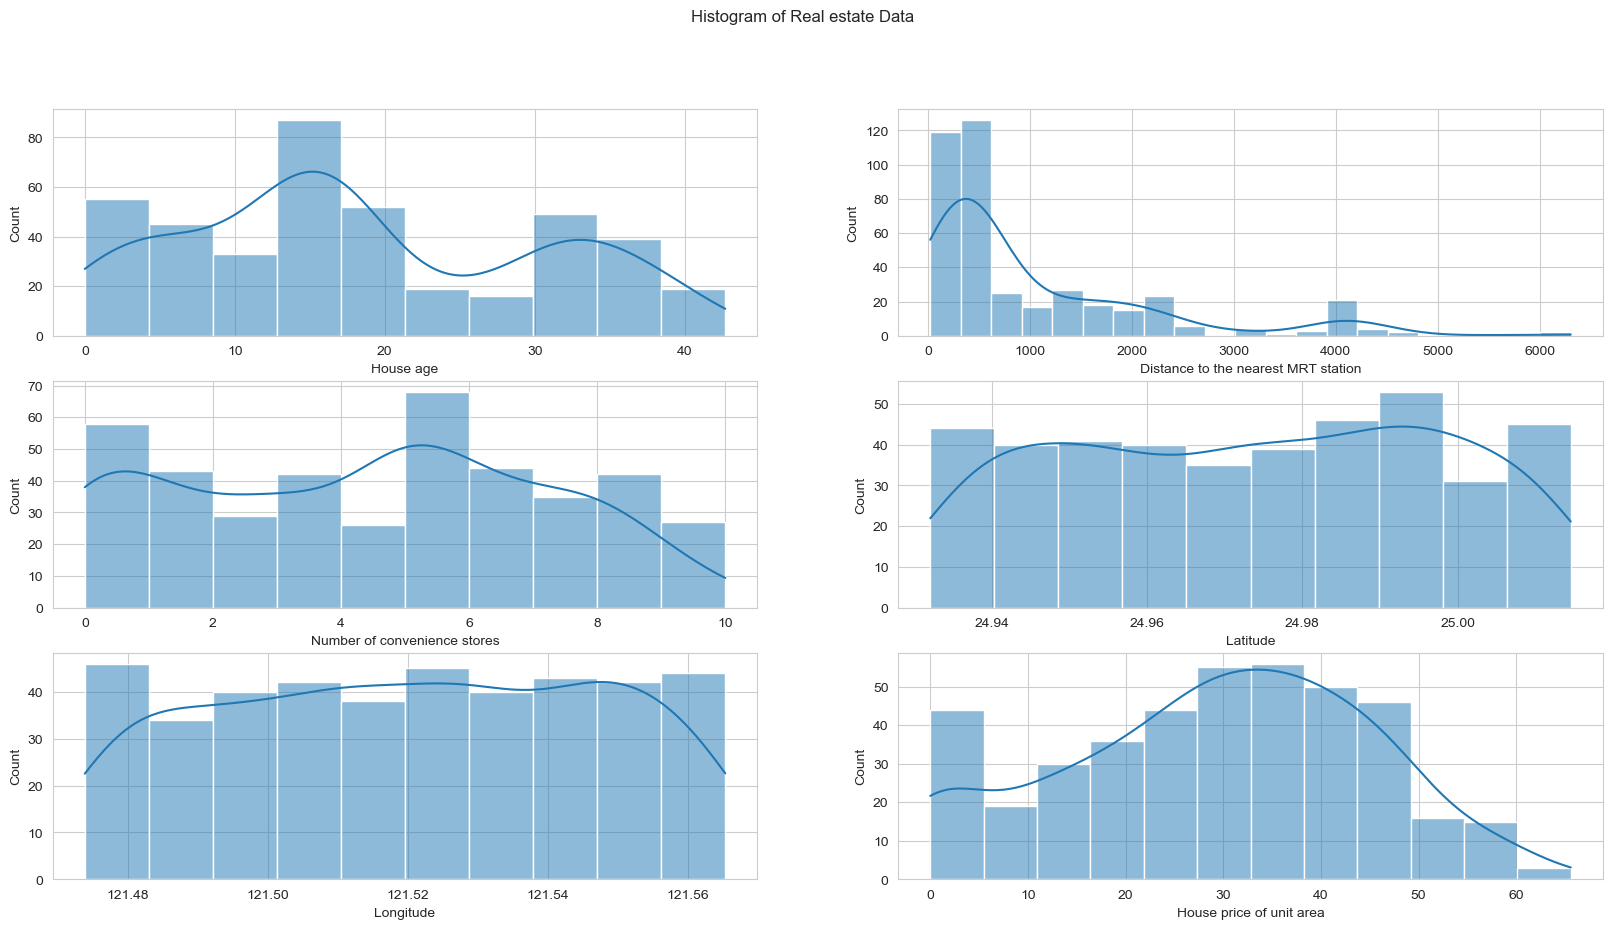

In [35]:
sns.set_style("whitegrid")
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

fig,ax=plt.subplots(3,2,figsize=(20,10))
fig.suptitle("Histogram of Real estate Data")
for var,subplot in zip(cols,ax.flatten()):
    sns.histplot(real_estate_data[var],ax=subplot,kde=True)

Distribution of house age shows that there is increase in new properties.     Ditribution of Nearest MRT Station shows that most properties are located near MRT Station.   Number of Convenience stores shows that stores shows peak at 0,5,10 means the stores are available.      longitude and latitude shows concentrated distribution that properties are located in a limited area.      House prices of unit area shows the concentration of properties in the lower price range and fewer properties as price increases.

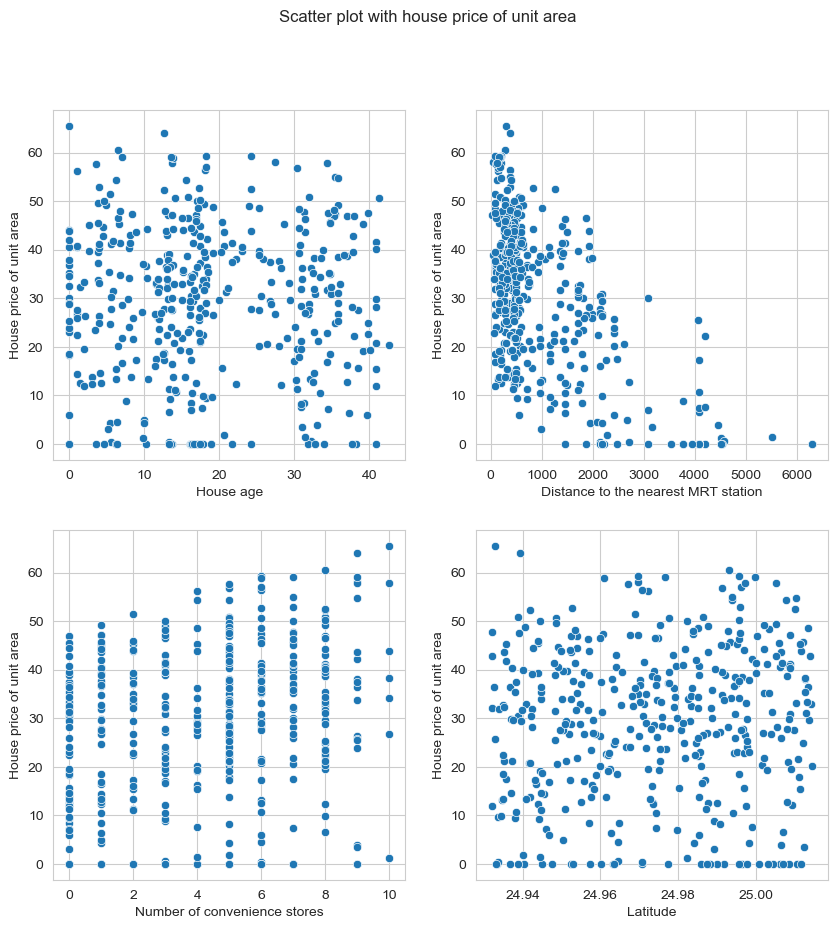

In [38]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Scatter plot with house price of unit area")
sns.scatterplot(data=real_estate_data,x='House age',y='House price of unit area',ax=axes[0,0])
sns.scatterplot(data=real_estate_data,x='Distance to the nearest MRT station',y='House price of unit area',ax=axes[0,1])
sns.scatterplot(data=real_estate_data,x='Number of convenience stores',y='House price of unit area',ax=axes[1,0])
sns.scatterplot(data=real_estate_data,x='Latitude',y='House price of unit area',ax=axes[1,1])
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

There is no linear relationship between houe age and price.
There is negative relationship between price and distance to the nearest MRT station when distance increases price decreases.
There is positive relationship between number of convenience stores and price. propertiy with high convenience stores tend to have high prices.
There is no strong relationship between latitude and price.

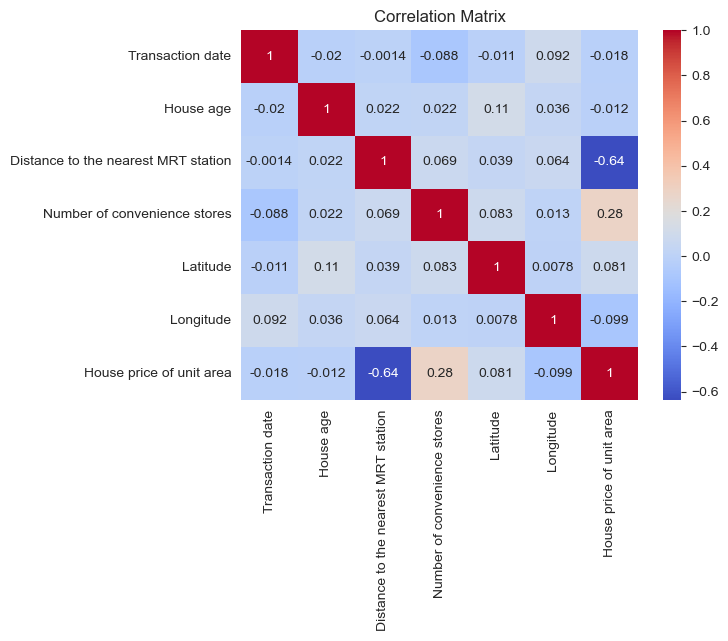

In [41]:
correlation_matrix = real_estate_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

There is a weak negative correlation with house price and age (-0.012).
There is strong negative correlation with house price and MRT Stations. means properties close to MRT statin has higher prices. (0.637).
There is positive correlation between price and convenience stores (0.281).
latitude and lognitude shows weak correlation with prices .


The factors affecting to house prices are Distance to the nearest MRT Stations and number of convenience stores.
The factors age and latitude and longitude affect less to price.

In [45]:
features = ['Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']
target = 'House price of unit area'

# Train test split

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X=real_estate_data[features]
y=real_estate_data[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

# Fitting the linear regression model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [63]:
model.score(X_train,y_train)

0.5182529798133284

In [65]:
y_pred = model.predict(X_test)

# Ploting  actual and predicted house prices

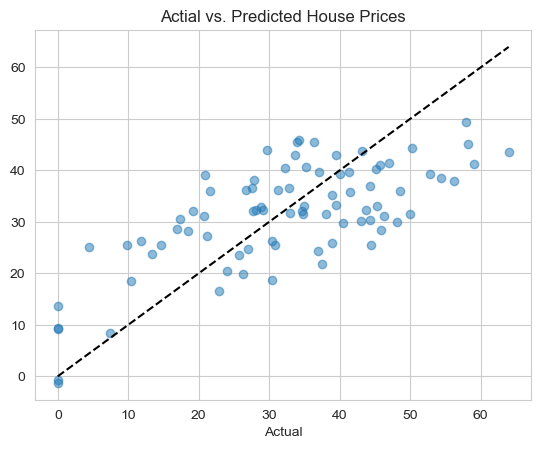

In [68]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--')
plt.xlabel('Actual')
plt.title('Actial vs. Predicted House Prices')
plt.show()

In [70]:
model.score(X_train,y_train)

0.5182529798133284

In [72]:
r2_score(y_test,y_pred) # coeficient of Determination

0.49952563911519865

In [74]:
mean_squared_error(y_test,y_pred) 

112.53595800378154

In [76]:
model.predict(pd.DataFrame([[274,8,25,121]], 
                                columns= ['Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']))

array([64.69302233])

## Linear regression using statsmodel library

In [81]:
import statsmodels.api as sm

In [82]:
x=sm.add_constant(X)

In [85]:
model = sm.OLS(y,x)

model=model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.521
Model:                                  OLS   Adj. R-squared:                  0.517
Method:                       Least Squares   F-statistic:                     111.3
Date:                      Fri, 25 Oct 2024   Prob (F-statistic):           4.03e-64
Time:                              10:00:56   Log-Likelihood:                -1575.8
No. Observations:                       414   AIC:                             3162.
Df Residuals:                           409   BIC:                             3182.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                3060.3367   2492.255      1.228      0.220   -1838.891    7959.565
Distance to the nearest MRT station    -0.0087      0.000    -19.135      0.000      -0.010      -0.008
Number of convenience stores            1.7515      0.188      9.310      0.000       1.382       2.121
Latitude                               52.5146     22.376      2.347      0.019       8.528      96.502
Longitude                             -35.7222     20.008     -1.785      0.075     -75.054       3.610
==============================================================================
Omnibus:                      117.907   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.979
Skew:                           0.031   Prob(JB):                     4.59e-05
Kurtosis:                       1.926   Cond. No.                     7.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

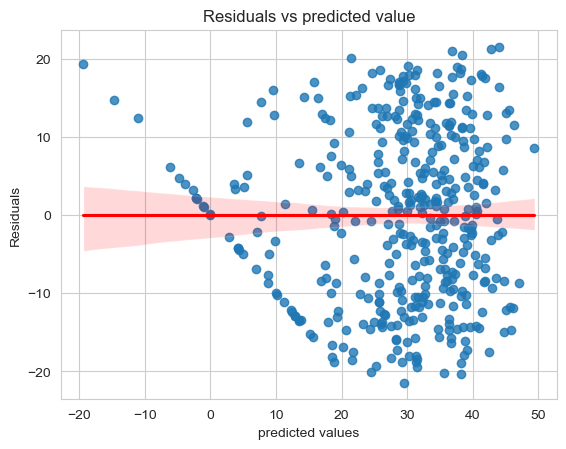

In [87]:
fitted_vals=model.predict()
resids=model.resid

sns.regplot(x=fitted_vals,y=resids,line_kws={'color':'red'})
plt.title('Residuals vs predicted value')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()

--------------------------------------------

Checking normality of residuals

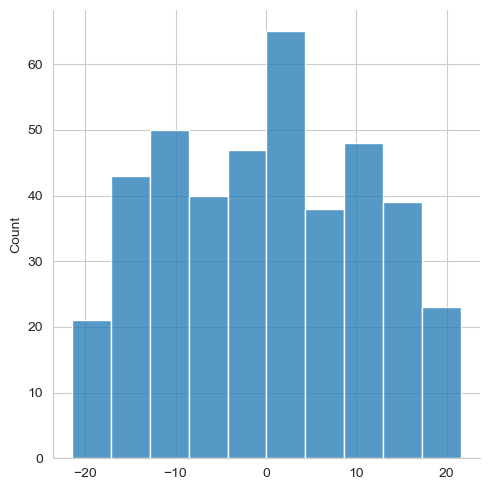

In [91]:
sns.displot(model.resid)
plt.show()  

In [96]:
from scipy import stats

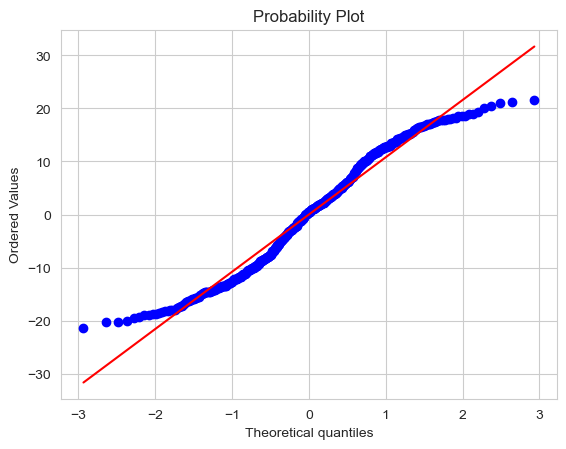

In [98]:
stats.probplot(resids,plot=sns.mpl.pyplot)
plt.show()

from the histogram and normal probability plot error are normally distributed.

--------------------------------------------

In [103]:
resids_standardized=model.get_influence().resid_studentized_internal

checking heteroscedasticity means checking the constant variance assumption. to check the outliers

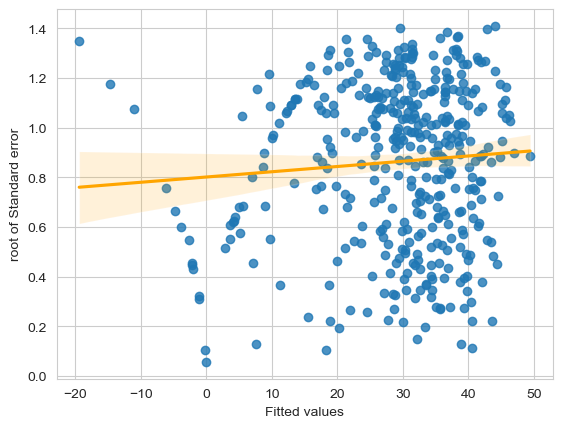

In [107]:
sns.regplot(x=fitted_vals,y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})
plt.xlabel('Fitted values')
plt.ylabel('root of Standard error')
plt.show()

no pattern detected hence heteroscedasticity is not present.

--------------------------------------------------

Variance inflation factor

Checking for multicolinearity

In [153]:
vif1=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])

,0
Distance to the nearest MRT station,1.009956
Number of convenience stores,1.011376
Latitude,1.008039
Longitude,1.004241


no value is greater than 10 hence no multicoliearity exists